# Medical Data Visualization

This notebook demonstrates how to process and visualize medical examination data using Pandas, Seaborn, and Matplotlib. We will create a categorical plot and a heatmap to explore relationships in the dataset.

---

## 1. Import Necessary Libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## 2. Load and Preprocess the Data

### Load the dataset from the CSV file.


In [2]:
df = pd.read_csv('medical_examinations.csv')


### Calculate the `overweight` column

The `overweight` column is derived from BMI, and it is encoded as `1` if BMI > 25, otherwise `0`.


In [3]:
df['overweight'] = df['weight'] / ((df['height']/100)**2)
df['overweight'] = (df['overweight'] > 25).astype(int)


### Normalize the data for cholesterol and glucose levels

For both cholesterol and glucose, values greater than `1` are set to `1`, and others to `0`.


In [4]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)


## 3. Draw the Categorical Plot

### Create the Categorical Plot function
This function generates a categorical plot that visualizes the distribution of various health-related variables, separated by the presence of cardiovascular disease.


c:\Users\Aymen GLX\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


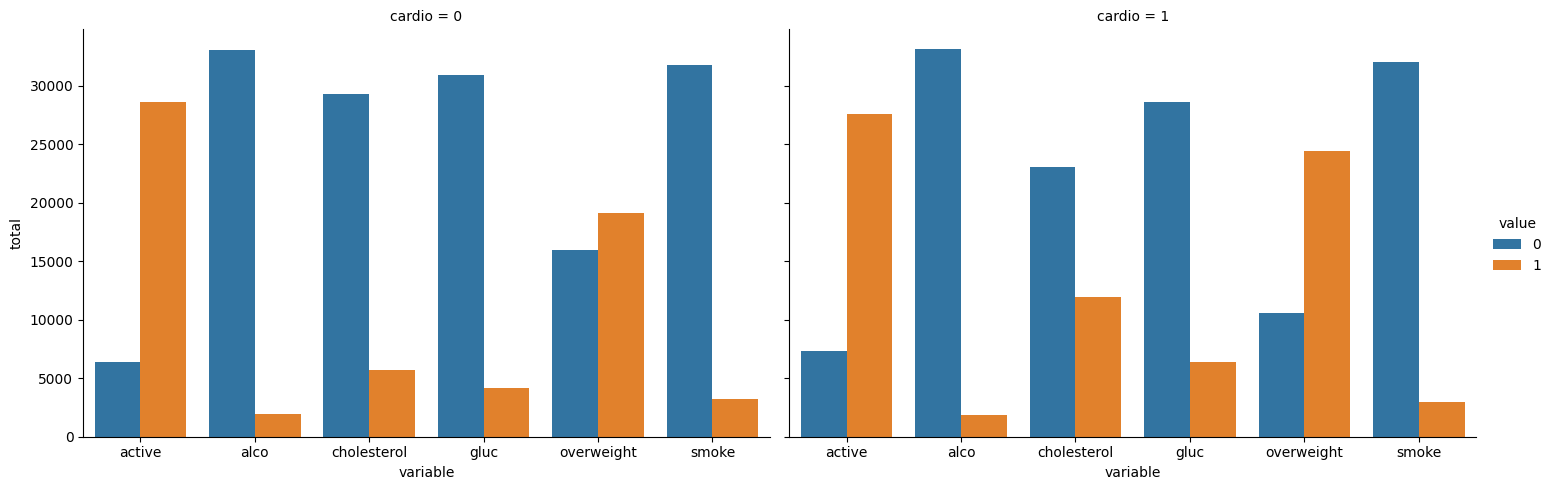

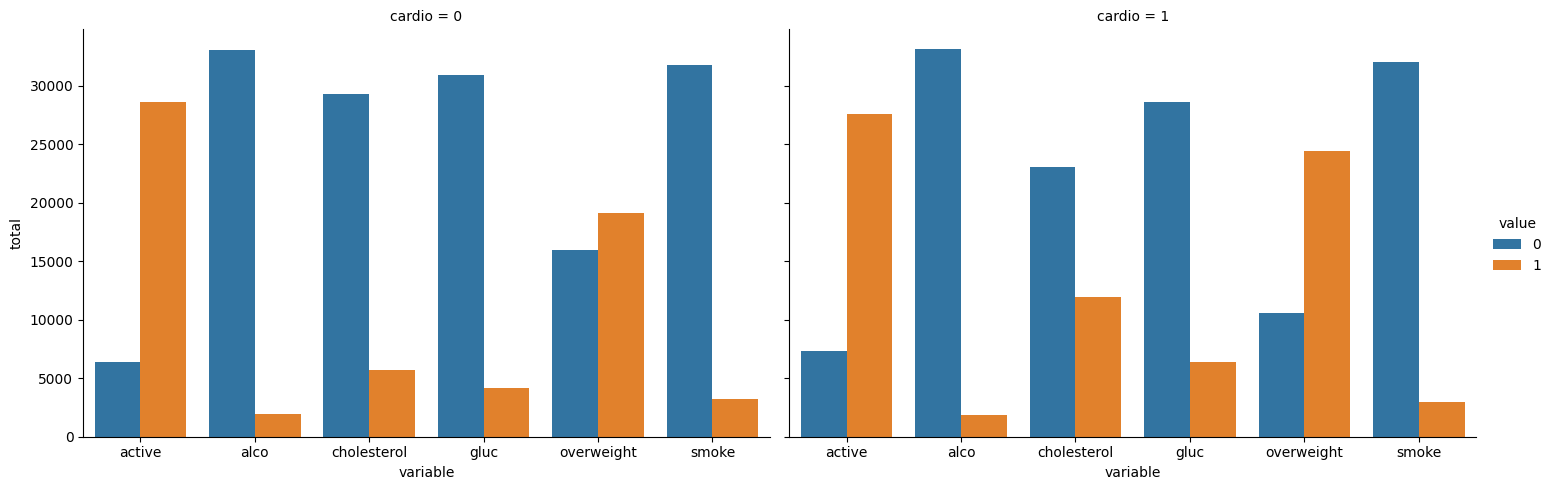

In [5]:
def draw_cat_plot():
    # Melt the dataframe to long format
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

    # Group the data and calculate totals
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
    
    # Draw the categorical plot
    fig = sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar', height=5, aspect=1.5)

    # Set axis labels and titles
    fig.set_axis_labels("variable", "total")
    fig.set_titles("cardio = {col_name}")

    # Save the plot
    fig.savefig('catplot.png')
    fig = fig.fig
    return fig

# Call the function to draw the plot
draw_cat_plot()


## 4. Draw the Heatmap

### Create the Heatmap function
This function generates a heatmap to visualize the correlation between features after removing outliers from the dataset.


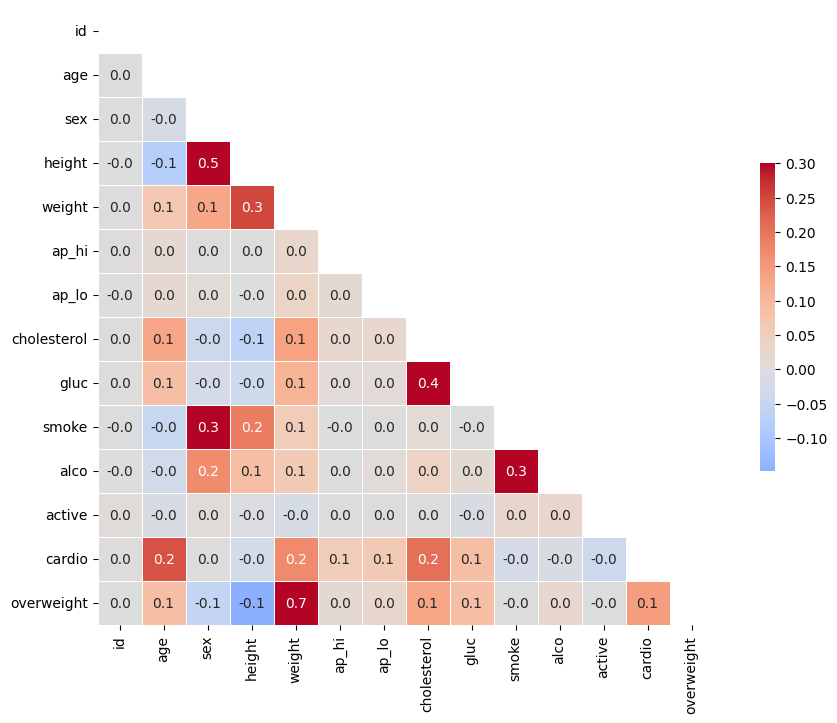

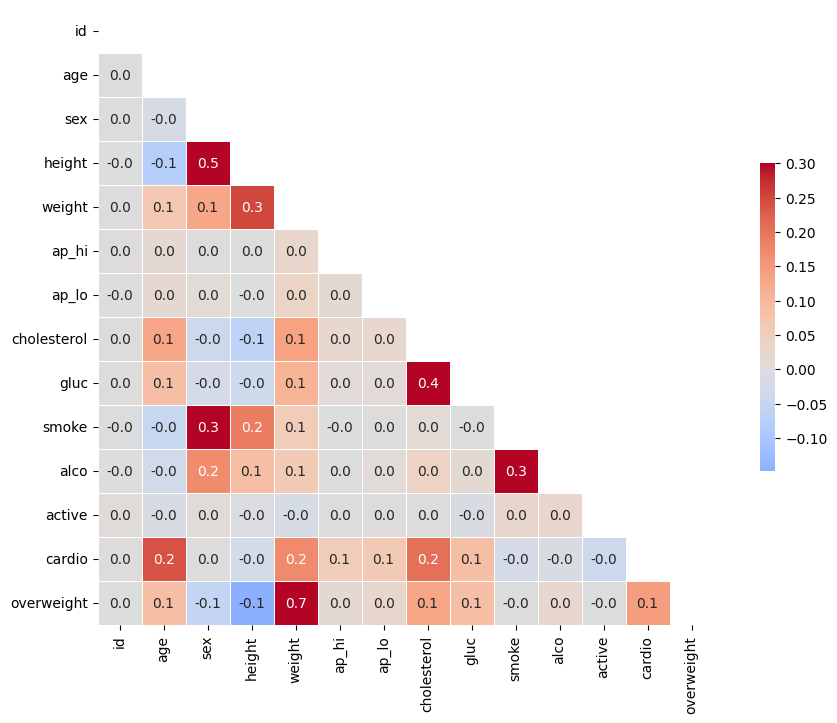

In [6]:
def draw_heat_map():
    # Remove outliers
    df_heat = df[
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Draw the heatmap
    sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap='coolwarm', vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

    # Save the heatmap
    fig.savefig('heatmap.png')
    return fig

# Call the function to draw the heatmap
draw_heat_map()
